In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import seaborn as sns

In [20]:
#display versions
print( 'Jupyter Notebook Version:{}' .format(sys.version))
print('Numpy Version:{}:'.format(np.__version__))
print('Pandas Version:{}'.format(  pd.__version__))
print('Matplotlib Version: {}'.format(matplotlib.__version__))
print('Seaborn Version: {}'.format(sns.__version__))

Jupyter Notebook Version:3.5.2 |Enthought, Inc. (x86_64)| (default, Mar  2 2017, 16:37:47) [MSC v.1900 64 bit (AMD64)]
Numpy Version:1.13.3:
Pandas Version:0.20.3
Matplotlib Version: 2.0.0
Seaborn Version: 0.8.1


In [21]:
#load dataset as a pandas dataframe
#obtained from https://archive.ics.uci.edu/ml/datasets/Automobile
dset = pd.read_csv("automobiles.csv")

In [22]:
#df for encoded data , df_pure for non encoded
df = pd.DataFrame(dset)
#df_pure = pd.DataFrame(dset)

In [23]:
df.shape

(205, 26)

In [24]:
df = df[df.price!= '?']

In [25]:
df.shape

(201, 26)

In [26]:
#getting types of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

In [27]:
df = df.drop('normalized-losses',axis=1)

In [28]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [29]:
# #clean the dataset; removing the NaN and infinity values
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

In [30]:

#clean_dataset(df);

In [31]:
#convert type of price from object to float
df.price = df.price.astype('float64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-null object
peak-rpm             201 non-nul

In [33]:
#obtaining numerical attributes for correlation
df_numeric=df.select_dtypes(include=['float64', 'int64'])

df_numeric.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450.0


In [34]:
#obtain correlation matrix of the numeric dataset
cor = df_numeric.corr()

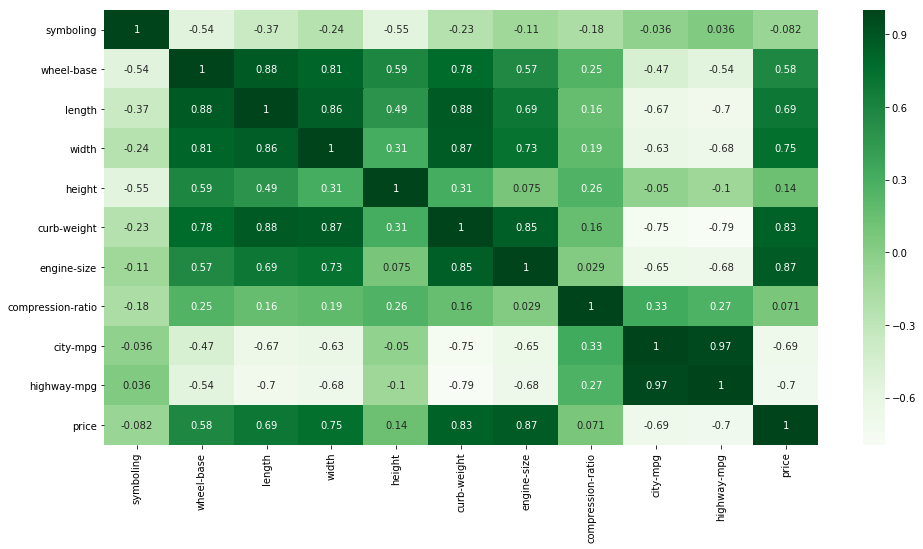

In [35]:
# figure size
plt.figure(figsize=(16,8))

# heatmap to check the relationship between different numerical attributes
sns.heatmap(cor, cmap="Greens", annot=True)
plt.show()

In [36]:
#df = df.drop('symboling',axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-null object
peak-rpm             201 non-nul

In [20]:
#Encoding the dataset
from sklearn.preprocessing import LabelEncoder   

In [21]:
le=LabelEncoder()

In [22]:
for col in df.columns.values:
    if df[col].dtypes=='object':
        data = df[col]
        le.fit(data.values)
        df[col]=le.transform(df[col])

In [23]:
df.shape

(201, 25)

In [24]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,1,0,2,0,2,0,88.6,168.8,...,130,5,23,4,9.0,5,10,21,27,13495.0
1,3,0,1,0,2,0,2,0,88.6,168.8,...,130,5,23,4,9.0,5,10,21,27,16500.0
2,1,0,1,0,2,2,2,0,94.5,171.2,...,152,5,1,27,9.0,20,10,19,26,16500.0
3,2,1,1,0,1,3,1,0,99.8,176.6,...,109,5,13,24,10.0,2,16,24,30,13950.0
4,2,1,1,0,1,3,0,0,99.4,176.6,...,136,5,13,24,8.0,8,16,18,22,17450.0


In [25]:
#import for dividing dataset into train and test samples
from sklearn.model_selection import train_test_split

In [26]:
#perform train test split
x = df.drop('price',axis=1)
y = df.price

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [27]:
x_train.shape

(160, 24)

In [28]:
y_train.shape

(160, 1)

In [29]:
x_test.shape

(41, 24)

In [30]:
y_test.shape

(41, 1)

In [31]:
# #plot the graphs of the variation in data
# x_train[x_train.dtypes[(x_train.dtypes=="float64")|(x_train.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11]);

In [32]:
#performing linear regression
from sklearn.linear_model import LinearRegression

In [33]:
linearRegressor = LinearRegression()

In [34]:
linearRegressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
#performing prediction
y_predict = linearRegressor.predict(x_test)

In [36]:
#displaying output side by side
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [37]:
display(pd.DataFrame(y_test))
display(pd.DataFrame(y_predict))

,price
19,6295.0
174,10698.0
110,13860.0
101,13499.0
181,15750.0
186,8495.0
5,15250.0
150,5348.0
13,21105.0
156,6938.0


,0
0,8320.765484
1,11706.587858
2,21368.552392
3,20796.166804
4,15372.750202
5,7231.555169
6,15818.017647
7,6174.767465
8,18769.058743
9,5860.730582


In [38]:
#import library for accuracy calculation
from sklearn.metrics import r2_score

In [39]:
r2_score(y_test,y_predict)

0.8682283416389861

In [40]:
#0.8682... without dropping symboling
#mean difference = 54.358

In [43]:
#calculate the mean difference
np.mean(y_test-y_predict)

price    54.358505
dtype: float64

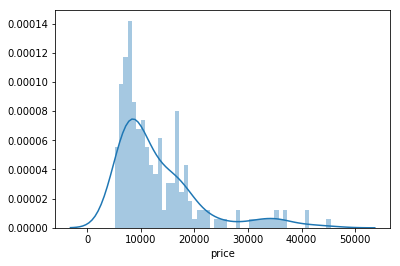

In [44]:
#making a plot of the price distribution so as to show the mean difference is not much
sns.distplot(df['price'],bins=50)
plt.show()